In [1]:
!pip install importlib-metadata==4.13.0
#!pip install dionysus
#!pip install gudhi
#!pip install persim
!pip install xarray
#!pip install validclust
#!pip install POT==0.5.1
#!pip install persim
#!pip install Ripser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive',force_remount=True)

import os
os.chdir("/content/drive/My Drive/NASA")
!ls -ltr

Mounted at /content/drive
total 14447
-rw------- 1 root root    1667 Oct  5  2022  zigzagtools.py
-rw------- 1 root root   85452 Oct  5  2022  zigzag_PD_eps_1.pdf
-rw------- 1 root root       0 Oct  5  2022  VRrips.pk
-rw------- 1 root root  133051 Oct  5  2022  PIs_labelled_modulo_month.pdf
-rw------- 1 root root  132779 Oct  5  2022  PIs_labelled_modulo_month_1.pdf
-rw------- 1 root root  105850 Oct  5  2022  PIs_labelled_modulo_month_0.pdf
-rw------- 1 root root  127787 Oct  5  2022  PIs_labelled_1.pdf
-rw------- 1 root root  116243 Oct  5  2022  PIs_labelled_0.pdf
-rw------- 1 root root  253295 Oct  5  2022  PClouds.pdf
-rw------- 1 root root 1682280 Oct  5  2022  Merra_t2m_freudenthal_Oct_2022.ipynb
-rw------- 1 root root  324306 Oct  5  2022  Merra_t2m_freudenthal.ipynb
-rw------- 1 root root  323836 Oct  5  2022  MERRA2_t2m_GP_20210201-20210228.nc
-rw------- 1 root root 1690684 Oct  5  2022  MERRA2_t2m_CONUS_20210201-20210228.nc
-rw------- 1 root root  527019 Oct  5  2022  MERRA

In [3]:
import numpy as np
#import dionysus as d
import matplotlib.pyplot as plt
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
#import gudhi as gd
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from scipy.spatial import Delaunay

In [4]:
fname = 'MERRA2_t2m_GP_20210201-20210228.nc'
ds = xr.open_dataset(fname)
data = ds['t2m'].squeeze()

print (np.array(data[0,:, :]))

[[288.49606323 289.03155518 287.08218384 ... 282.00143433 282.7444458
  283.34893799]
 [286.56442261 286.54849243 284.95831299 ... 281.21334839 281.68276978
  281.62319946]
 [283.40982056 283.60250854 282.26071167 ... 280.56246948 280.49966431
  280.5128479 ]
 ...
 [272.62832642 272.45513916 272.47271729 ... 265.21435547 265.72332764
  265.02468872]
 [272.60656738 272.92019653 272.78347778 ... 264.9175415  265.2008667
  264.56951904]
 [275.76651001 275.35919189 274.49002075 ... 264.76290894 264.65261841
  263.64828491]]


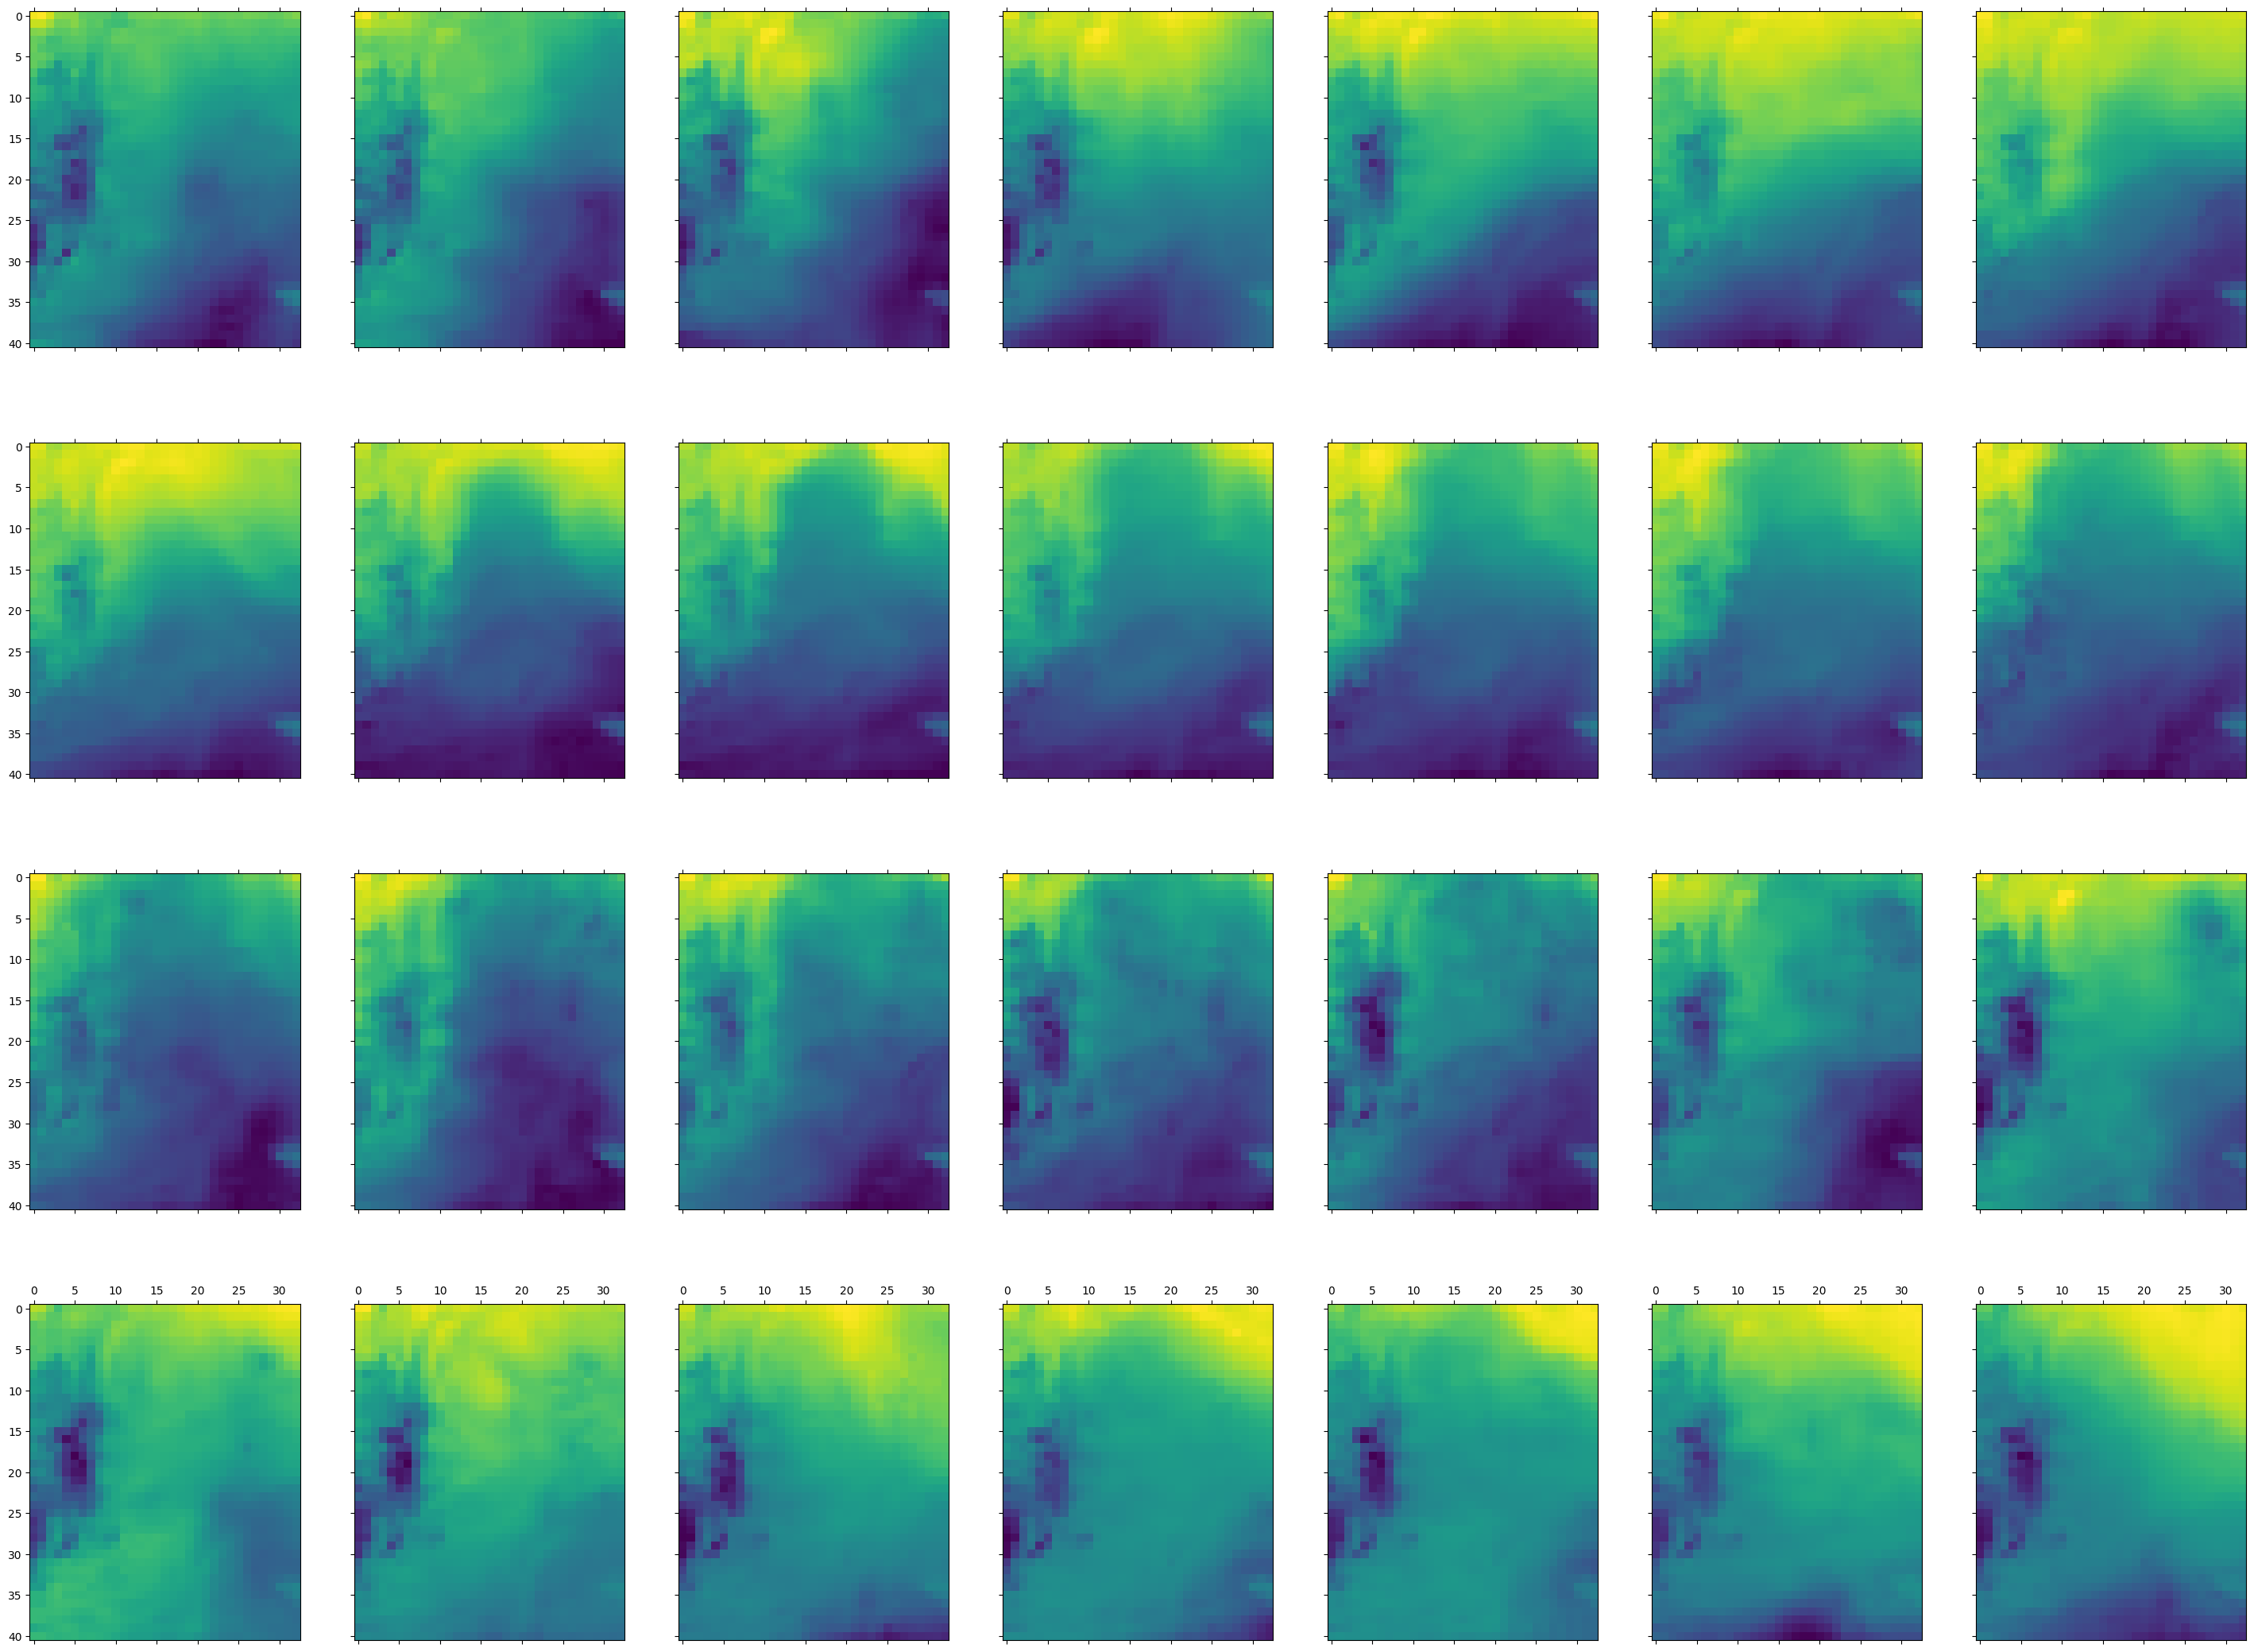

In [5]:
fig, ax = plt.subplots(4, 7, sharex='col', sharey='row', figsize=(36, 27))
for i in range(0, 4):
    for j in range(0, 7):
        ax[i, j].matshow(np.array(data[i*7 + j,:, :]))

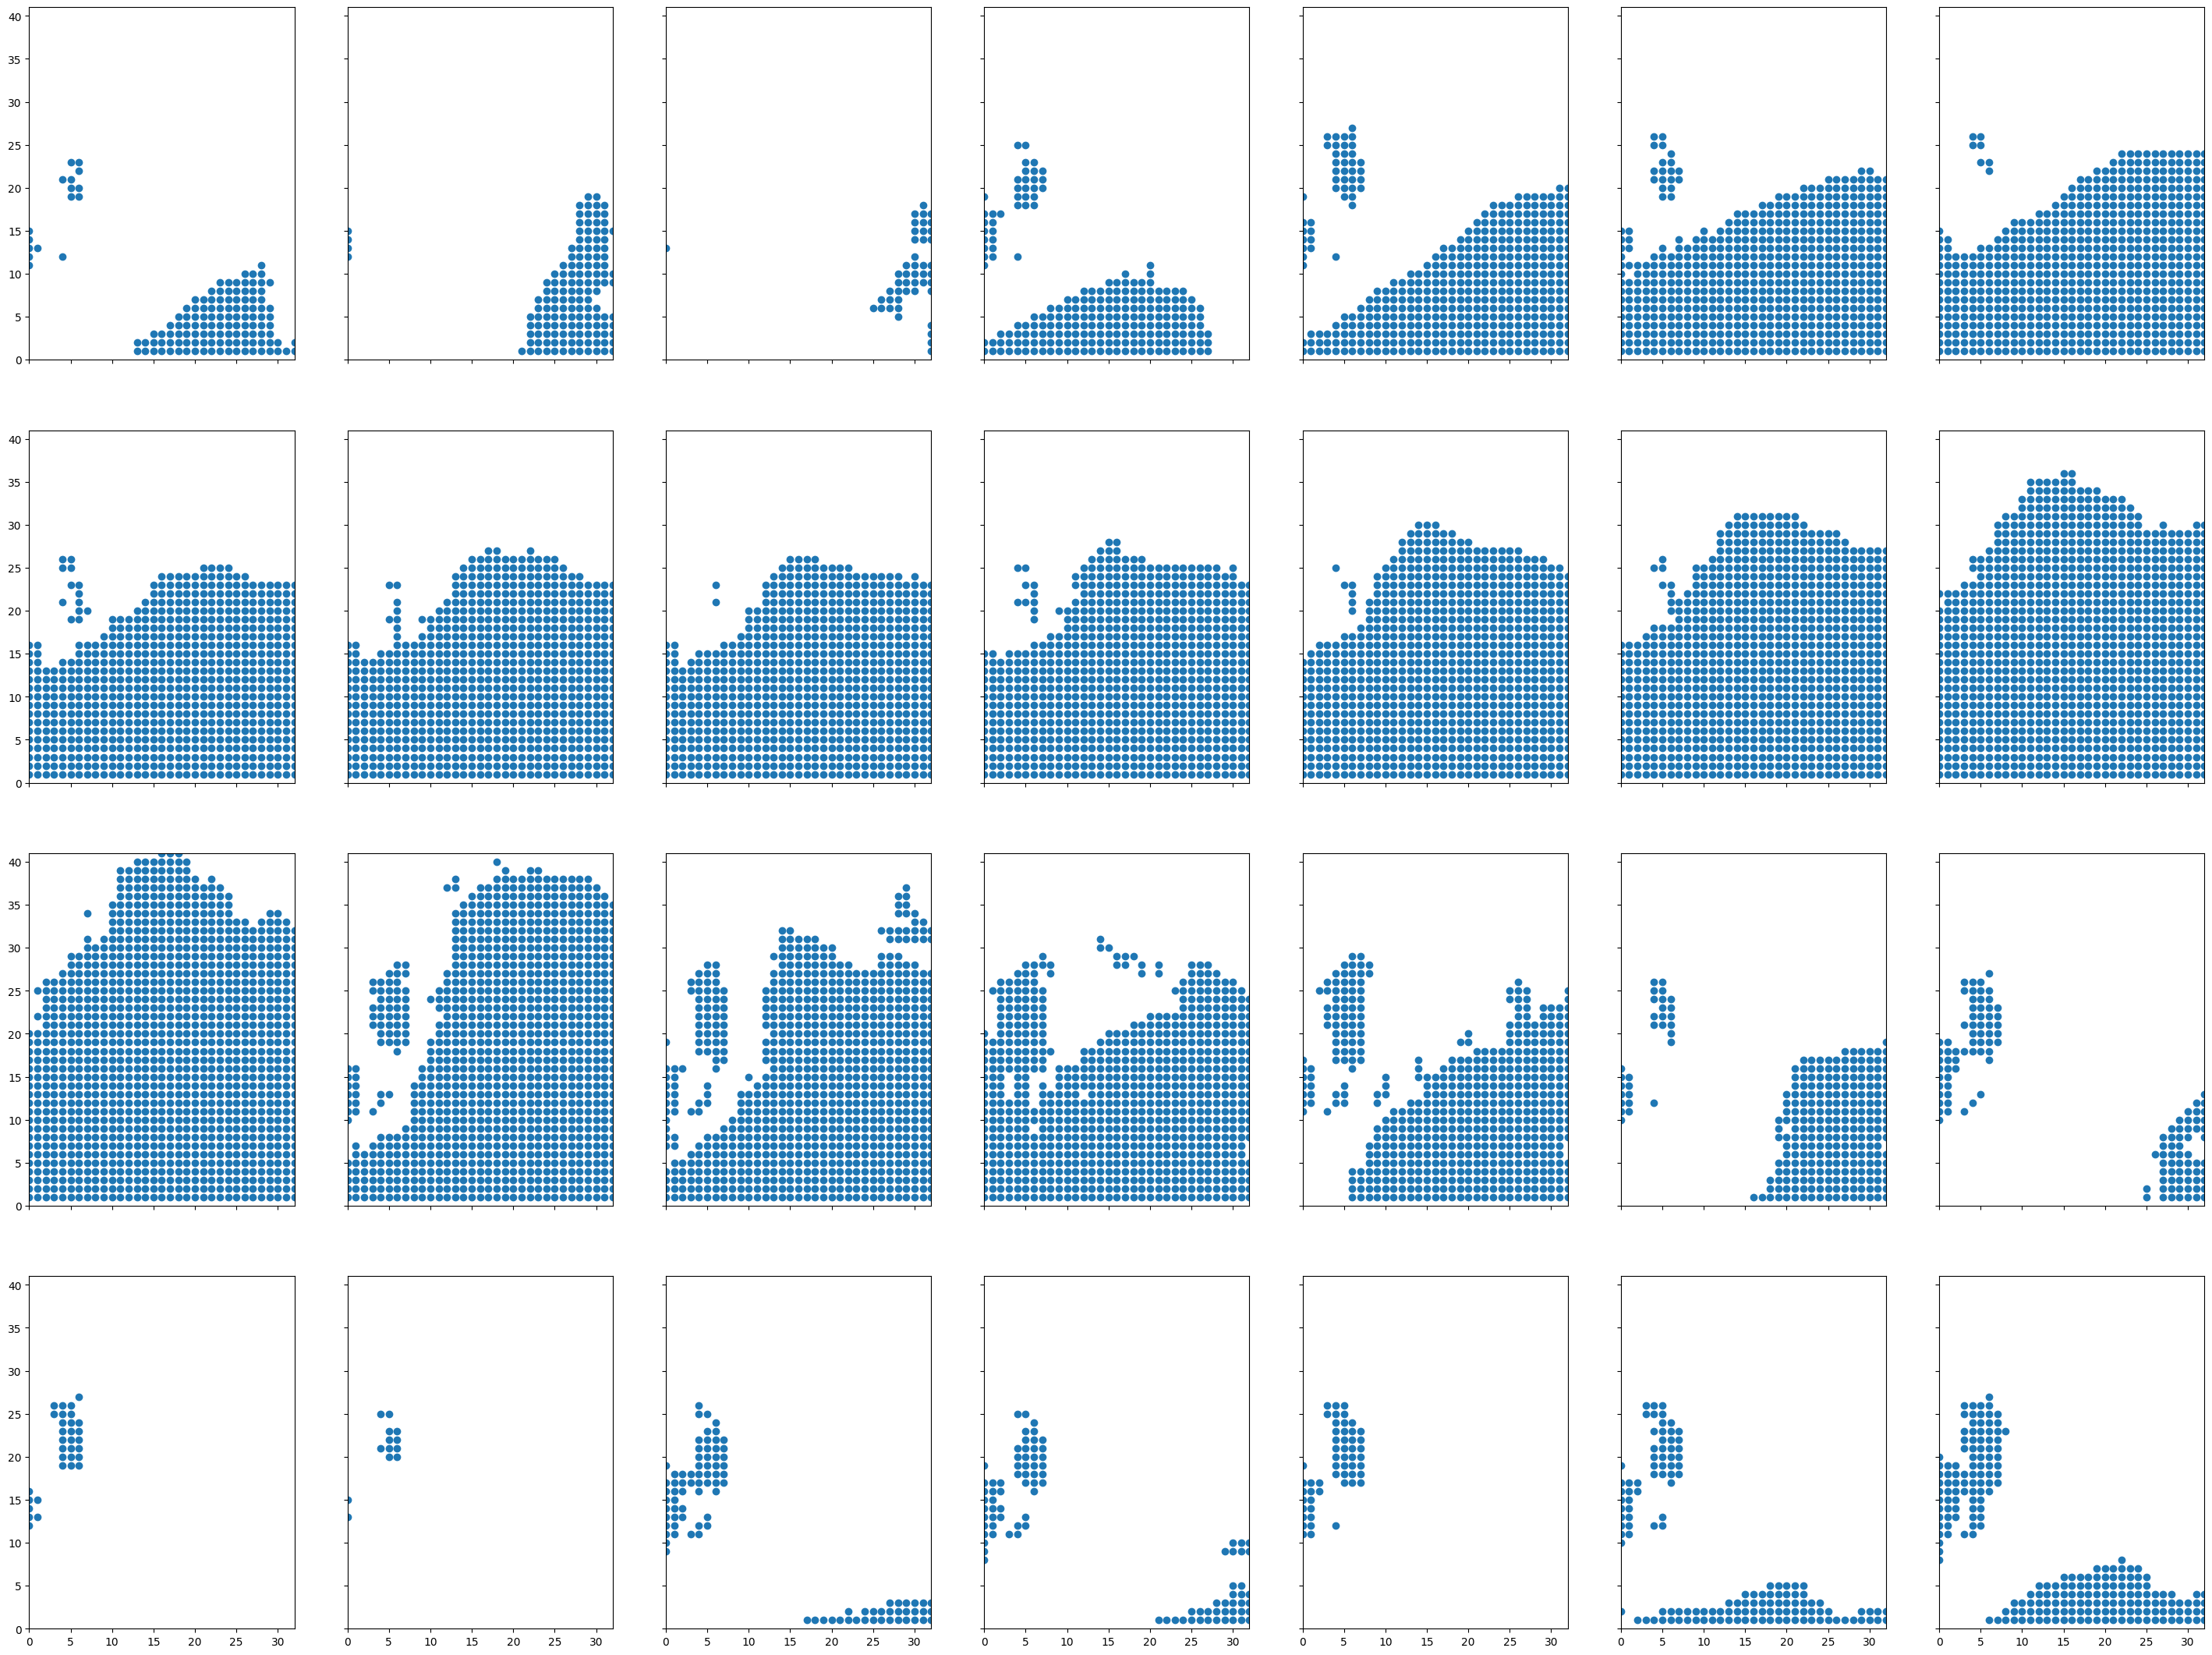

In [6]:
heatLevel = 265

fig, ax = plt.subplots(4, 7, sharex='col', sharey='row', figsize=(36, 27))
for i in range(0, 4):
    for j in range(0, 7):
        pointcloud = np.argwhere(np.array(data[i*7 + j ,: ,:]) < heatLevel)
        x = pointcloud[:, 1]
        y = 41 - pointcloud[:, 0]
        ax[i, j].scatter(x, y)
        ax[i, j].set_xlim([0, 32])
        ax[i, j].set_ylim([0, 41])
plt.show()

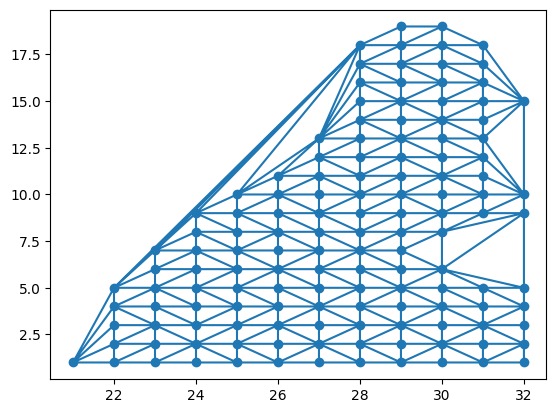

In [7]:
heatLevel = 265
pointcloud = np.argwhere(np.array(data[0*7 + 1 ,: ,:]) < heatLevel)
pointcloud[:, 0] = 41 - pointcloud[:, 0]

region1 = pointcloud[np.any(pointcloud == 0, axis=1)]
region2 = pointcloud[~np.any(pointcloud == 0, axis=1)]
#print (pointcloud)
#tri1 = Delaunay(region1)
tri2 = Delaunay(region2)

#plt.triplot(region1[:,1], region1[:,0], tri1.simplices)
#plt.plot(region1[:,1], region1[:,0], 'o', color='#1f77b4')

plt.triplot(region2[:,1], region2[:,0], tri2.simplices, color='#1f77b4')
plt.plot(region2[:,1], region2[:,0], 'o', color='#1f77b4')

#plt.xlim([0, 35])
#plt.ylim([0, 45])
plt.show()

In [8]:
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 34.1 MB/s eta 0:00:00


In [9]:
import gudhi as gd

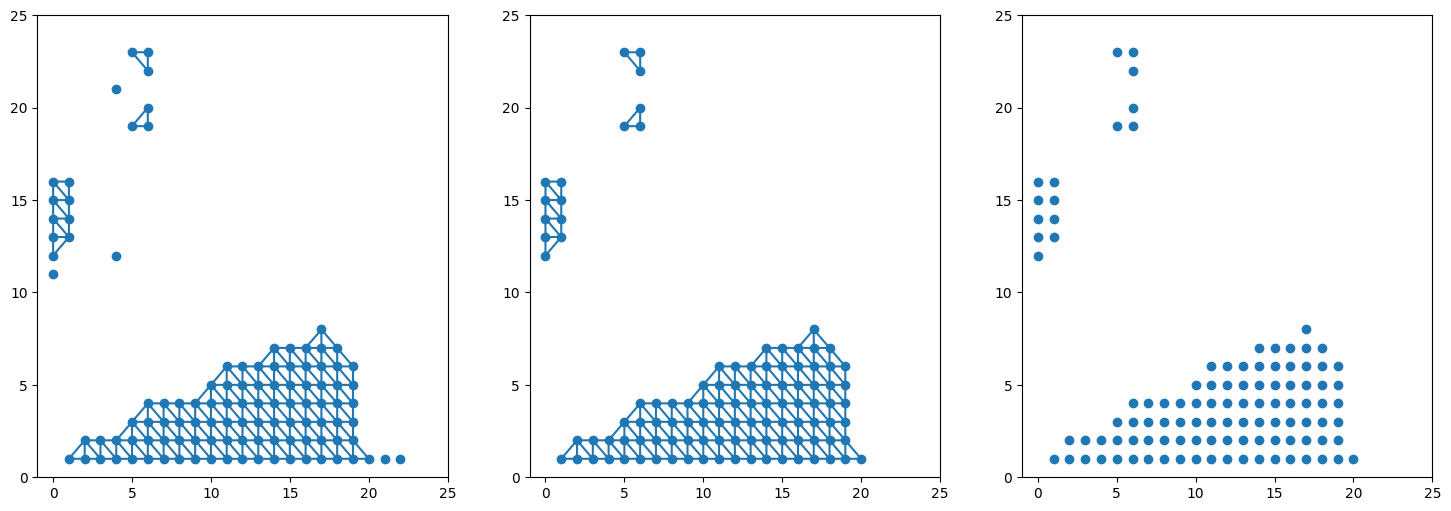

In [10]:
subLevel = 262
sample = np.argwhere(np.array(data[3 ,: ,:]) < subLevel) # test with second point cloud
sample[:, 0] = 41 - sample[:, 0]
#points = np.array([sample[:, 1], 41 - sample[:, 0]])

ac = gd.AlphaComplex(points=sample)
st = ac.create_simplex_tree()

points = np.array([ac.get_point(i) for i in range(st.num_vertices())])
points[:, [1, 0]] = points[:, [0, 1]]
toRemove = np.array([[21.,  1.],
                     [22.,  1.],
                     [0., 11.],
                     [4., 12.],
                     [4. ,21.]])

def diffSet(a, b):
    a1_rows = a.view([('', a.dtype)] * a.shape[1])
    a2_rows = b.view([('', b.dtype)] * b.shape[1])
    c = np.setdiff1d(a1_rows, a2_rows).view(a.dtype).reshape(-1, a.shape[1])
    return c

restPoints = diffSet(points, toRemove)
# We want to plot the alpha-complex with alpha=1 by default.
# We are only going to plot the triangles
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= 1])

#test = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 1 and s[1] <= 1])
#print ([x[0] for x in st.get_skeleton(2)])

fig, axs = plt.subplots(1, 3, figsize = (18, 6))

axs[0].triplot(sample[:,1], sample[:,0], triangles, color='#1f77b4')
axs[0].plot(sample[:,1], sample[:,0], 'o', color='#1f77b4')
axs[0].set_xlim(-1, 25)
axs[0].set_ylim(0, 25)

axs[1].triplot(sample[:,1], sample[:,0], triangles, color='#1f77b4')
axs[1].plot(restPoints[:,0], restPoints[:,1], 'o', color='#1f77b4')
axs[1].set_xlim(-1, 25)
axs[1].set_ylim(0, 25)

#axs[1].triplot(sample[:,1], sample[:,0], triangles, color='#1f77b4')
axs[2].plot(restPoints[:,0], restPoints[:,1], 'o', color='#1f77b4')
axs[2].set_xlim(-1, 25)
axs[2].set_ylim(0, 25)
plt.show()

In [11]:
!pip install descartes
!pip install alphashape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.1/681.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.2 MB/s eta 0:00:00


In [12]:
!pip install alpha_shapes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from descartes import PolygonPatch
import alphashape
from alpha_shapes import Alpha_Shaper, plot_alpha_shape

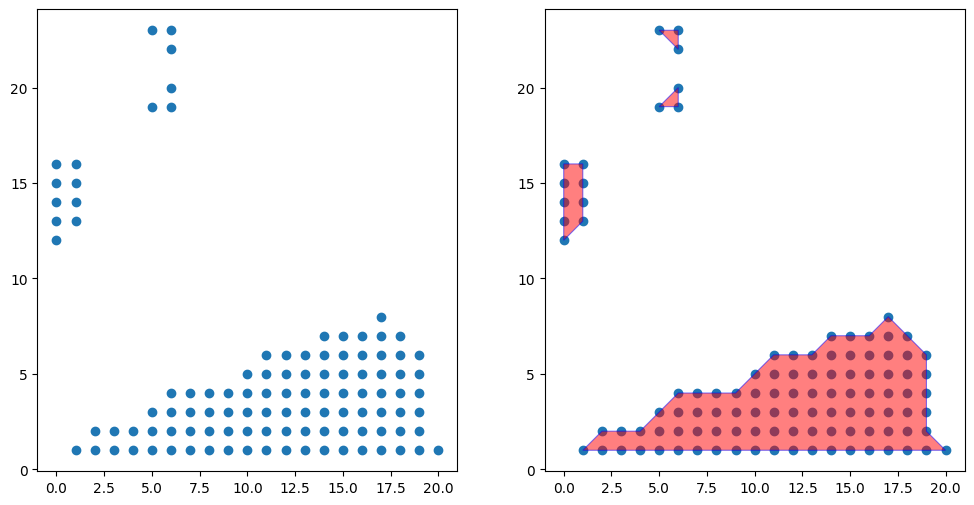

In [16]:
shaper = Alpha_Shaper(restPoints)
alpha = 20.0
alpha_shape = shaper.get_shape(alpha=alpha)

#fig, (ax0, ax1) = plt.subplots(1, 2)
fig, axs = plt.subplots(1, 2, figsize = (12, 6))
axs[0].scatter(*zip(*restPoints))
#axs[0].set_title('data')
axs[1].scatter(*zip(*restPoints))
plot_alpha_shape(axs[1], alpha_shape)
#axs[1].set_title(f"$\\alpha={alpha:.3}$")

for ax in (axs[0], axs[1]):
    ax.set_aspect('equal')

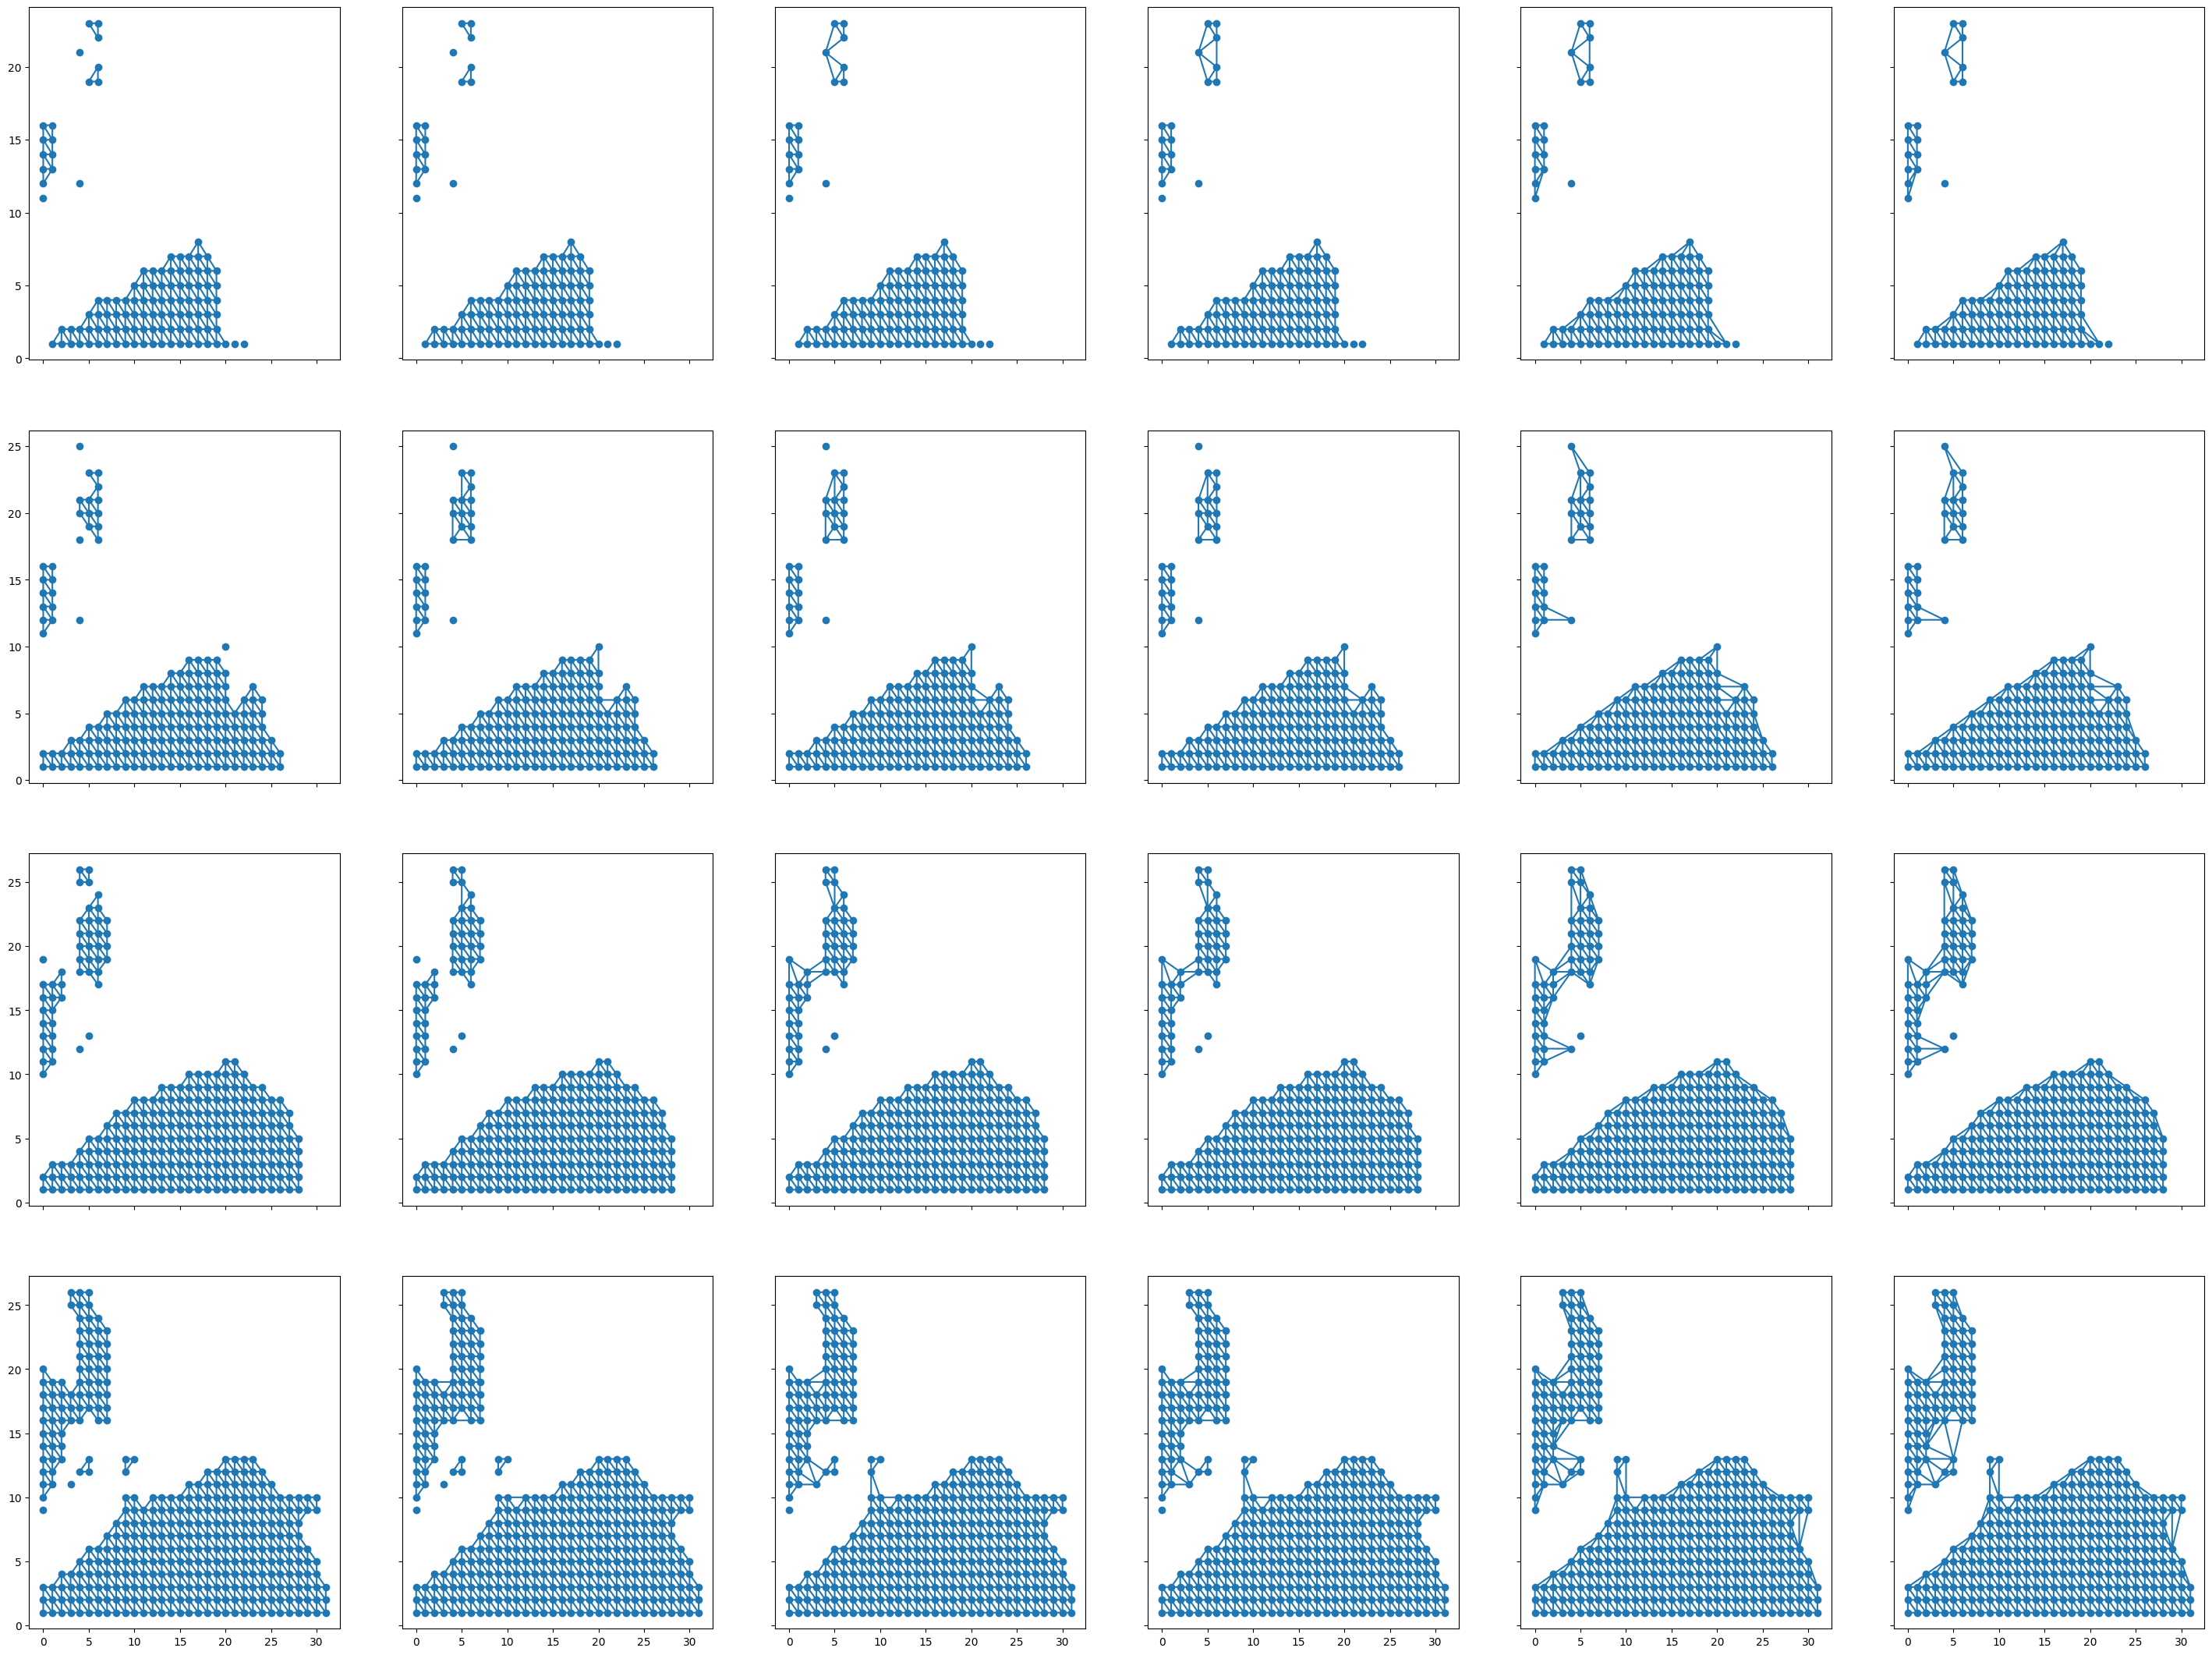

In [ ]:
subLevelRange = [262, 264, 266, 268]
rRange = [0.5, 1, 1.5, 2, 2.5, 3]

nrow = len(subLevelRange)
ncol = len(rRange)

fig, ax = plt.subplots(nrow, ncol, sharex='col', sharey='row', figsize=(36, 27))
for i in range(0, nrow):
    for j in range(0, ncol):
        pointcloud = np.argwhere(np.array(data[3 ,: ,:]) < subLevelRange[i]) # use fourth point cloud as example 
        pointcloud[:, 0] = 41 - pointcloud[:, 0]

        ac = gd.AlphaComplex(points=pointcloud)
        st = ac.create_simplex_tree()

        points = np.array([ac.get_point(i) for i in range(st.num_vertices())])

        triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3 and s[1] <= rRange[j]])

        ax[i, j].triplot(pointcloud[:,1], pointcloud[:,0], triangles, color='#1f77b4')
        ax[i, j].plot(pointcloud[:,1], pointcloud[:,0], 'o', color='#1f77b4')

        #ax[i, j].set_xlim([0, 32])
        #ax[i, j].set_ylim([0, 41])
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

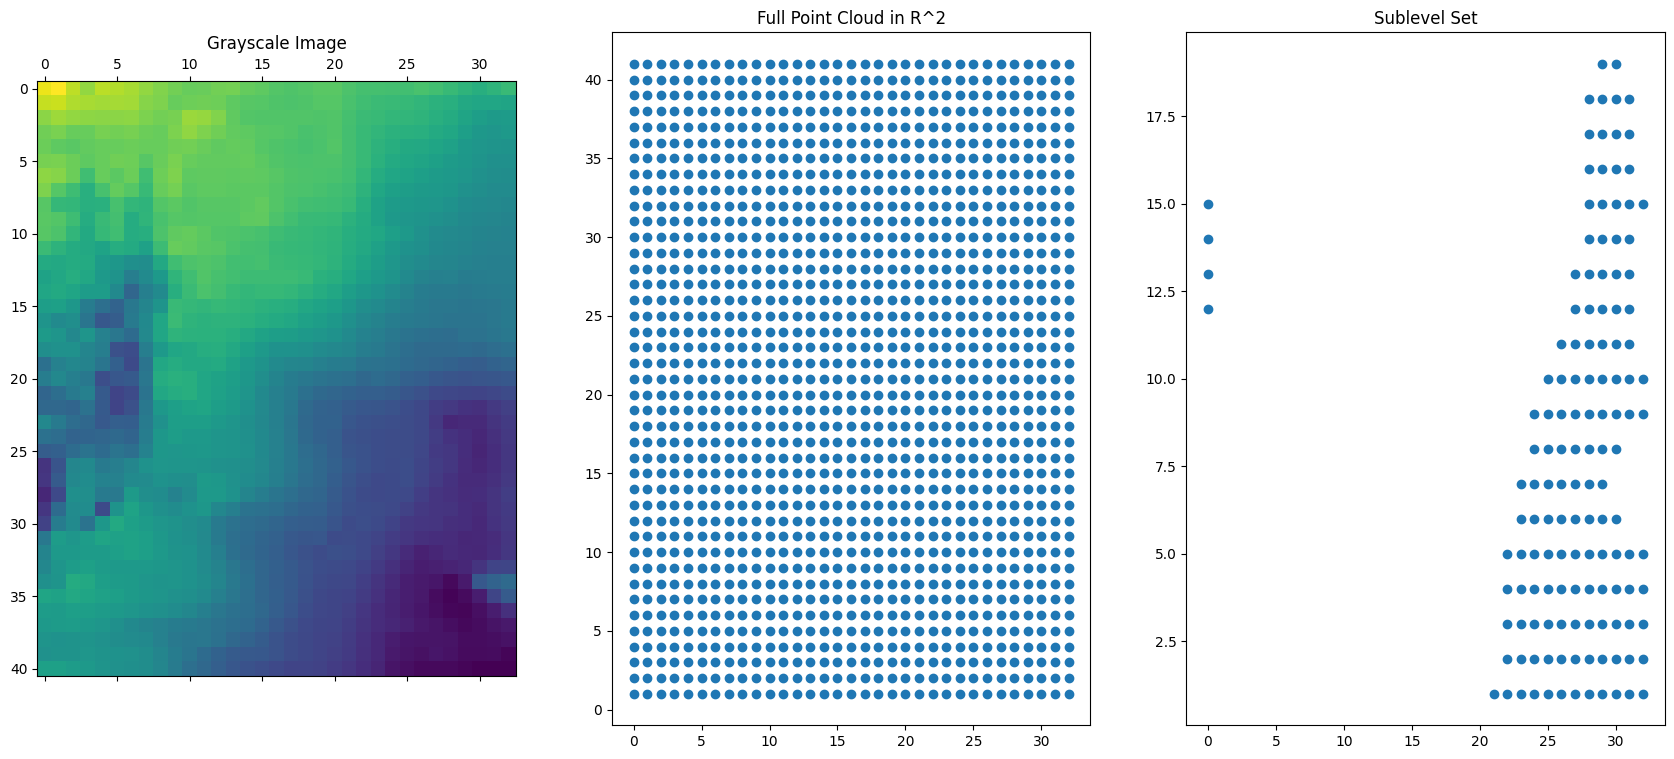

In [ ]:
# Example in writeup

sublevel1 = 300
pointcloud1 = np.argwhere(np.array(data[1 ,: ,:]) < sublevel1)
x1 = pointcloud1[:, 1]
y1 = 41 - pointcloud1[:, 0]

sublevel2 = 265
pointcloud2 = np.argwhere(np.array(data[1 ,: ,:]) < sublevel2)
x2 = pointcloud2[:, 1]
y2 = 41 - pointcloud2[:, 0]

# use second image as example 
fig, axs = plt.subplots(1, 3, figsize = (21, 9))
#fig.suptitle('title here')
axs[0].matshow(np.array(data[1,:, :]))
axs[0].set_title('Grayscale Image')
axs[1].scatter(x1, y1)
axs[1].set_title('Full Point Cloud in R^2')
#ax[1].xlim([0, 32])
#ax[1].ylim([0, 41])
axs[2].scatter(x2, y2)
axs[2].set_title('Sublevel Set')
#ax[2].set_xlim([0, 32])
#ax[2].set_ylim([0, 41])
plt.plot

In [ ]:
# Example in writeup

